I just started learning the language [Julia](https://julialang.org/). Here's something I found nice. Look how easy it is to get a least-squares regression line.

Say you have some points like this


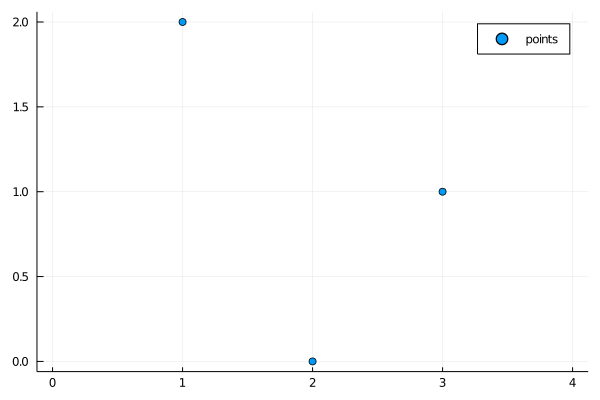

In [1]:
using Plots
xs = [1,2,3]; ys = [2,0,1];
scatter(xs, ys, label="points", xlim=[0,4])

To fit a regression line, if we express the problem as finding values for the slope $m$ and the intercept $b$ which comes as close as possible to solving
$\mathbf y = m \mathbf x + b$, that is,

$\begin{pmatrix} 2\\0\\1 \end{pmatrix}  = m \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} + b$. 

We find coefficients vector $\mathbf c=\begin{pmatrix}m\\b\end{pmatrix}$ to solve
$\mathbf y= A\mathbf c$, where 

$A=\begin{pmatrix} 1&1\\2&1\\3&1\end{pmatrix} $.  

In Julia:

In [2]:
A = hcat(xs,ones(length(xs)))

3×2 Array{Float64,2}:
 1.0  1.0
 2.0  1.0
 3.0  1.0

With these columns of $A$ being independent, the equation for the best fit line (by least squares) is
$\hat{\mathbf c} =( A^\top A )^{-1} A^\top \mathbf y$, that is, left multiplication of $\mathbf y$ by the [Moore-Penrose pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Linearly_independent_columns) of $A$.  In Julia, the versatile [backslash operator, `\`](https://docs.julialang.org/en/v1/base/math/#Base.:\\-Tuple{Any,Any}) will automatically calculate this inverse.

In [3]:
slope, intercept = A \ ys  # so simple!

2-element Array{Float64,1}:
 -0.5000000000000002
  2.000000000000001

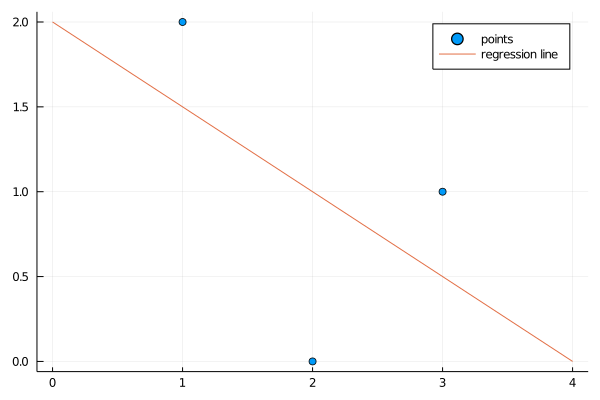

In [4]:
scatter(xs,ys,label="points")
plot!(x -> slope*x + intercept, minimum(xs)-1,maximum(xs)+1,
    label="regression line")